In [7]:
import sys
import os

import phys
import phys.newton
import phys.light
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sim = phys.Simulation(params={"bounds": np.array([1000, 1000, 1000]), "cl_on": True, "exit": lambda cond: len(cond.objects) == 0})


sim.add_objs(phys.light.generate_photons(1000, bins=100, dist="gauss", min=phys.light.E_from_wavelength(200e-9), max=phys.light.E_from_wavelength(700e-9)))

First, we set up a simulation with a given set of bounds, and an exit condition. We also set `cl_on` to `True` to turn on OpenCL.  

In [8]:
sim.add_step(0, phys.UpdateTimeStep(lambda s: np.double(0.001)))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
n = np.double(0.001)
A = np.double(0.001)
sim.add_step(2, phys.light.ScatterDeleteStep(n, A))
m1 = phys.light.ScatterMeasureStep(None, True, [np.array([1 / (n * A), np.nan, np.nan], dtype=np.double)])
sim.add_step(3, m1)

We add a series of steps to our simulation, which will run in a loop when the simulation starts. First, we add a step that updates the time with a function that returns a constant. In essence, at each step of the simulation, $\Delta t = 0.001 s$, and $t \gets t + \Delta t$. Then we add a step that will move each object in the simulation according to the laws of Newtonian kinematics (i.e. $x = x_0 + vt$). Finally, we add our `ScatterDeleteStep`, with a given $n_{targ}$ and $A_{targ}$. This will remove a photon with $P(removal) = n_{targ} \cdot A_{targ}$. Then we use `ScatterMeasureStep` to measure the number of photons remaining in the simulation and the number of photons that have passed through a plane at $x = \frac{1}{n_{targ} \cdot A_{targ}}$

In [9]:
sim.start()

while sim.running:
        time.sleep(0.1)
        print(sim.get_state())

{'objects': 15938, 't': 0.001, 'dt': 0.001, 'run_time': 0.11191749572753906}
{'objects': 14689, 't': 0.001, 'dt': 0.001, 'run_time': 0.21883487701416016}
{'objects': 13072, 't': 0.001, 'dt': 0.001, 'run_time': 0.32676196098327637}
{'objects': 12080, 't': 0.001, 'dt': 0.001, 'run_time': 0.4326796531677246}
{'objects': 11217, 't': 0.001, 'dt': 0.001, 'run_time': 0.5615801811218262}
{'objects': 10035, 't': 0.002, 'dt': 0.001, 'run_time': 0.6684961318969727}
{'objects': 8373, 't': 0.002, 'dt': 0.001, 'run_time': 0.7813990116119385}
{'objects': 7893, 't': 0.003, 'dt': 0.001, 'run_time': 0.8883228302001953}
{'objects': 5491, 't': 0.003, 'dt': 0.001, 'run_time': 0.9992389678955078}
{'objects': 3801, 't': 0.005, 'dt': 0.001, 'run_time': 1.1061437129974365}
{'objects': 1291, 't': 0.008, 'dt': 0.001, 'run_time': 1.2160587310791016}
{'objects': 0, 't': 0.02900000000000002, 'dt': 0.001, 'run_time': 1.3209772109985352}


Then we start the simulation. It will run in a separate thread and we will print the state of the simulation (given in a dictionary) every 0.1 seconds. This will slow down the simulation significantly, but it will allow us to determine it is working.

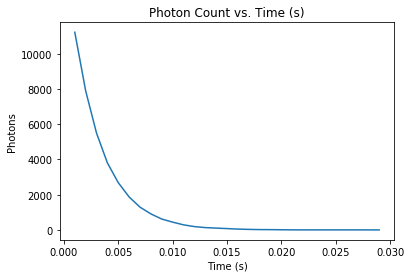

In [10]:
plt.plot(sim.ts, [x[1] for x in m1.data], label="n")
plt.ylabel("Photons")
plt.xlabel("Time (s)")
plt.title("Photon Count vs. Time (s)")

plt.show()

As we can see using matplotlib, the photons appear to follow a rate of natural decay (i.e. $N_\gamma \propto e^{-x}$)